In [51]:
#General Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import hvplot.pandas
import json

#Dependecies for description words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import unicodedata

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gbnlo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
#Load + Read CSV
wine_data_load = "Data/winemag-data-130k-v2.csv"

wine_data_df = pd.read_csv(wine_data_load, encoding = 'latin-1')

wine_data_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin OâKeefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [53]:
#Describte the points + price to determine ranges
#wine_data_df["points"].describe()
wine_data_df["price"].describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [54]:
#sorted_score_df = wine_data_df.sort_values("points",ascending=False)
#sorted_score_df.dropna()
price_points_df = pd.DataFrame().assign(Points=wine_data_df['points'], Price=wine_data_df['price'])
price_points_df.dropna().head()

,Points,Price
1,87,15.0
2,87,14.0
3,87,13.0
4,87,65.0
5,87,15.0


In [55]:
price_points_df.dropna()
price_points_df["Points"].astype('float')
price_points_df["Points"].describe()
#price_points_df.head()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: Points, dtype: float64

In [56]:
#Calculate value score by wine

price_points_df.dropna()
price_points_df["Points"].astype('float')
value_score = price_points_df["Points"]/price_points_df["Price"]
#value_score.describe()
#price_points_df["Value Score"] = value_score
#price_points_df.head()

In [57]:
#Create new shortened data frame + assign value score
price_points_df = pd.DataFrame().assign(Title=wine_data_df['title'],Variety=wine_data_df['variety'],Points=wine_data_df['points'], Price=wine_data_df['price'])

value_score = (price_points_df["Price"]+price_points_df["Points"])/price_points_df["Price"]
price_points_df["Value Score"] = value_score
price_points_descending_df=price_points_df.sort_values("Value Score",ascending=False)
price_points_descending_df.dropna()

,Title,Variety,Points,Price,Value Score
64590,Bandit NV Merlot (California),Merlot,86,4.0,22.500000
126096,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,86,4.0,22.500000
20484,Dancing Coyote 2015 White (Clarksburg),White Blend,85,4.0,22.250000
1987,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,85,4.0,22.250000
110255,Bandit NV Merlot (California),Merlot,84,4.0,22.000000
...,...,...,...,...,...
113564,Domaine du Comte Liger-Belair 2005 La RomanÃ©e,Pinot Noir,96,2000.0,1.048000
120391,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,91,2013.0,1.045206
98380,Domaine du Comte Liger-Belair 2010 La RomanÃ©e,Pinot Noir,96,2500.0,1.038400
15840,ChÃ¢teau PÃ©trus 2014 Pomerol,Bordeaux-style Red Blend,96,2500.0,1.038400


In [58]:
price_points_ascending_df=price_points_df.sort_values("Value Score")
price_points_ascending_df.dropna()

,Title,Variety,Points,Price,Value Score
80290,ChÃ¢teau les Ormes Sorbet 2013 MÃ©doc,Bordeaux-style Red Blend,88,3300.0,1.026667
98380,Domaine du Comte Liger-Belair 2010 La RomanÃ©e,Pinot Noir,96,2500.0,1.038400
15840,ChÃ¢teau PÃ©trus 2014 Pomerol,Bordeaux-style Red Blend,96,2500.0,1.038400
120391,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,91,2013.0,1.045206
113564,Domaine du Comte Liger-Belair 2005 La RomanÃ©e,Pinot Noir,96,2000.0,1.048000
...,...,...,...,...,...
112919,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,84,4.0,22.000000
20484,Dancing Coyote 2015 White (Clarksburg),White Blend,85,4.0,22.250000
1987,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,85,4.0,22.250000
126096,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,86,4.0,22.500000


In [59]:
#Set Bins + Labels
price_bins = [0.0, 17.0, 25.0, 42.0, 100.0]
labels = ["Low Cost (<$17)","Medium Cost ($18-$25)","High Cost ($26-$42)","Splurge Cost ($43-$100)"]

In [60]:
#Create a copy of price points descending
per_price_point_summary = price_points_descending_df.copy()

In [61]:
#Best value low price
per_price_point_summary["Best Value (By Price)"] = pd.cut(price_points_descending_df["Price"],price_bins,labels=labels)
low_price_point_summary_df = per_price_point_summary.loc[per_price_point_summary["Best Value (By Price)"] == "Low Cost (<$17)", :]
low_price_point_summary_df.dropna().head(5)

,Title,Variety,Points,Price,Value Score,Best Value (By Price)
64590,Bandit NV Merlot (California),Merlot,86,4.0,22.50,Low Cost (<$17)
126096,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,86,4.0,22.50,Low Cost (<$17)
20484,Dancing Coyote 2015 White (Clarksburg),White Blend,85,4.0,22.25,Low Cost (<$17)
1987,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,85,4.0,22.25,Low Cost (<$17)
110255,Bandit NV Merlot (California),Merlot,84,4.0,22.00,Low Cost (<$17)


In [62]:
#Best value medium price
per_price_point_summary["Best Value (By Price)"] = pd.cut(price_points_descending_df["Price"],price_bins,labels=labels)
medium_price_point_summary_df = per_price_point_summary.loc[per_price_point_summary["Best Value (By Price)"] == "Medium Cost ($18-$25)", :]
medium_price_point_summary_df.dropna().head(5)

,Title,Variety,Points,Price,Value Score,Best Value (By Price)
123776,Michael David 2012 Petite Petit Petite Sirah (...,Petite Sirah,94,18.0,6.222222,Medium Cost ($18-$25)
39318,Domaine CauhapÃ© 2011 Symphonie de Novembre (...,Petit Manseng,94,18.0,6.222222,Medium Cost ($18-$25)
6267,Stottle 2011 Lucille Late Harvest Viognier (Ya...,Viognier,94,18.0,6.222222,Medium Cost ($18-$25)
98438,Joseph Carr 2009 Dijon Clone Chardonnay (Sonom...,Chardonnay,94,18.0,6.222222,Medium Cost ($18-$25)
84597,David Hill 2013 Estate Riesling (Willamette Va...,Riesling,94,18.0,6.222222,Medium Cost ($18-$25)


In [63]:
#Best value high price
per_price_point_summary["Best Value (By Price)"] = pd.cut(price_points_descending_df["Price"],price_bins,labels=labels)
high_price_point_summary_df = per_price_point_summary.loc[per_price_point_summary["Best Value (By Price)"] == "High Cost ($26-$42)", :]
high_price_point_summary_df.dropna().head(5)

,Title,Variety,Points,Price,Value Score,Best Value (By Price)
101584,Melville 2008 Chardonnay (Sta. Rita Hills),Chardonnay,95,26.0,4.653846,High Cost ($26-$42)
9915,Domaine Zind-Humbrecht 2015 Goldert Grand Cru ...,Muscat,95,26.0,4.653846,High Cost ($26-$42)
19315,Russiz Superiore 2012 Sauvignon (Collio),Sauvignon,94,26.0,4.615385,High Cost ($26-$42)
46170,Domaine Michel Fonne 2012 Marckrain Grand Cru ...,Pinot Gris,94,26.0,4.615385,High Cost ($26-$42)
84832,Limerick Lane 2015 Grenache RosÃ© (Russian Riv...,RosÃ©,94,26.0,4.615385,High Cost ($26-$42)


In [64]:
#Best value splurge price
per_price_point_summary["Best Value (By Price)"] = pd.cut(price_points_descending_df["Price"],price_bins,labels=labels)
splurge_price_point_summary_df = per_price_point_summary.loc[per_price_point_summary["Best Value (By Price)"] == "Splurge Cost ($43-$100)", :]
splurge_price_point_summary_df.dropna().head(5)

,Title,Variety,Points,Price,Value Score,Best Value (By Price)
118059,Failla 2010 Estate Vineyard Chardonnay (Sonoma...,Chardonnay,99,44.0,3.250000,Splurge Cost ($43-$100)
99339,Domaine Sipp-Mack 2014 Osterberg Grand Cru Rie...,Riesling,95,43.0,3.209302,Splurge Cost ($43-$100)
63757,Chateau Dereszla 2009 AszÃº 5 Puttonyos (Tokaji),White Blend,95,43.0,3.209302,Splurge Cost ($43-$100)
12964,Ryan Cochrane 2014 Solomon Hills Vineyard Pino...,Pinot Noir,94,43.0,3.186047,Splurge Cost ($43-$100)
69513,Quinta do Crasto 2009 Reserva Vinhas Velhas Re...,Portuguese Red,94,43.0,3.186047,Splurge Cost ($43-$100)


In [65]:
stacked_outputs_df = pd.concat([low_price_point_summary_df.iloc[:5],medium_price_point_summary_df.iloc[:5],high_price_point_summary_df.iloc[:5],splurge_price_point_summary_df.iloc[:5]],axis=0)
stacked_outputs_df.head(20)

,Title,Variety,Points,Price,Value Score,Best Value (By Price)
64590,Bandit NV Merlot (California),Merlot,86,4.0,22.500000,Low Cost (<$17)
126096,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,86,4.0,22.500000,Low Cost (<$17)
20484,Dancing Coyote 2015 White (Clarksburg),White Blend,85,4.0,22.250000,Low Cost (<$17)
1987,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,85,4.0,22.250000,Low Cost (<$17)
110255,Bandit NV Merlot (California),Merlot,84,4.0,22.000000,Low Cost (<$17)
123776,Michael David 2012 Petite Petit Petite Sirah (...,Petite Sirah,94,18.0,6.222222,Medium Cost ($18-$25)
39318,Domaine CauhapÃ© 2011 Symphonie de Novembre (...,Petit Manseng,94,18.0,6.222222,Medium Cost ($18-$25)
6267,Stottle 2011 Lucille Late Harvest Viognier (Ya...,Viognier,94,18.0,6.222222,Medium Cost ($18-$25)
98438,Joseph Carr 2009 Dijon Clone Chardonnay (Sonom...,Chardonnay,94,18.0,6.222222,Medium Cost ($18-$25)
84597,David Hill 2013 Estate Riesling (Willamette Va...,Riesling,94,18.0,6.222222,Medium Cost ($18-$25)


In [66]:
stacked_outputs_df = pd.concat([low_price_point_summary_df.iloc[:5],medium_price_point_summary_df.iloc[:5],high_price_point_summary_df.iloc[:5],splurge_price_point_summary_df.iloc[:5]],axis=0)
stacked_outputs_df.head(20)


,Title,Variety,Points,Price,Value Score,Best Value (By Price)
64590,Bandit NV Merlot (California),Merlot,86,4.0,22.500000,Low Cost (<$17)
126096,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,86,4.0,22.500000,Low Cost (<$17)
20484,Dancing Coyote 2015 White (Clarksburg),White Blend,85,4.0,22.250000,Low Cost (<$17)
1987,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,85,4.0,22.250000,Low Cost (<$17)
110255,Bandit NV Merlot (California),Merlot,84,4.0,22.000000,Low Cost (<$17)
123776,Michael David 2012 Petite Petit Petite Sirah (...,Petite Sirah,94,18.0,6.222222,Medium Cost ($18-$25)
39318,Domaine CauhapÃ© 2011 Symphonie de Novembre (...,Petit Manseng,94,18.0,6.222222,Medium Cost ($18-$25)
6267,Stottle 2011 Lucille Late Harvest Viognier (Ya...,Viognier,94,18.0,6.222222,Medium Cost ($18-$25)
98438,Joseph Carr 2009 Dijon Clone Chardonnay (Sonom...,Chardonnay,94,18.0,6.222222,Medium Cost ($18-$25)
84597,David Hill 2013 Estate Riesling (Willamette Va...,Riesling,94,18.0,6.222222,Medium Cost ($18-$25)


In [67]:
#Raw Data Frame For ScatterPlots
raw_data = {'title': ['Bandit NV Merlot (California)',
'Cramele Recas 2011 UnWineD Pinot Grigio (Viile...',
'Dancing Coyote 2015 White (Clarksburg)',
'Felix Solis 2013 Flirty Bird Syrah (Vino de la...',
'Bandit NV Merlot (California)',
'Michael David 2012 Petite Petit Petite Sirah (...',
'Domaine Cauhapé 2011 Symphonie de Novembre (J...',
'Stottle 2011 Lucille Late Harvest Viognier (Ya...',
'Joseph Carr 2009 Dijon Clone Chardonnay (Sonom...',
'David Hill 2013 Estate Riesling (Willamette Va...',
'Melville 2008 Chardonnay (Sta. Rita Hills)',
'Domaine Zind-Humbrecht 2015 Goldert Grand Cru ...',
'Russiz Superiore 2012 Sauvignon (Collio)',
'Domaine Michel Fonne 2012 Marckrain Grand Cru ...',
'Limerick Lane 2015 Grenache Rosé (Russian Rive...',
'Failla 2010 Estate Vineyard Chardonnay (Sonoma...',
'Domaine Sipp-Mack 2014 Osterberg Grand Cru Rie...',
'Chateau Dereszla 2009 Aszú 5 Puttonyos (Tokaji)',
'Ryan Cochrane 2014 Solomon Hills Vineyard Pino...',
'Quinta do Crasto 2009 Reserva Vinhas Velhas Re...'], 
        'variety': ['Merlot','Pinot Grigio','White Blend','Syrah','Merlot','Petite Sirah','Petit Manseng','Viognier','Chardonnay','Riesling','Chardonnay','Muscat','Sauvignon','Pinot Gris','Rosé','Chardonnay','Riesling','White Blend','Pinot Noir','Portuguese Red'], 
        'points': [86,86,85,85,84,94,94,94,94,94,95,95,94,94,94,99,95,95,94,94],
        'price': [4,4,4,4,4,18,18,18,18,18,26,26,26,26,26,44,43,43,43,43], 
        'value_score': [22.5,22.5,22.3,22.3,22,6.2,6.2,6.2,6.2,6.2,4.7,4.7,4.6,4.6,4.6,3.3,3.2,3.2,3.1,3.1],
        'best_value_by_price': ['Low Cost (<$17)','Low Cost (<$17)','Low Cost (<$17)','Low Cost (<$17)','Low Cost (<$17)','Medium Cost ($18-$25)','Medium Cost ($18-$25)','Medium Cost ($18-$25)','Medium Cost ($18-$25)','Medium Cost ($18-$25)','High Cost ($26-$42)','High Cost ($26-$42)','High Cost ($26-$42)','High Cost ($26-$42)','High Cost ($26-$42)','Splurge Cost ($43-$100)','Splurge Cost ($43-$100)','Splurge Cost ($43-$100)','Splurge Cost ($43-$100)','Splurge Cost ($43-$100)']}
df = pd.DataFrame(raw_data, columns = ['title', 'variety', 'points', 'price', 'value_score', 'best_value_by_price'])
df

,title,variety,points,price,value_score,best_value_by_price
0,Bandit NV Merlot (California),Merlot,86,4,22.5,Low Cost (<$17)
1,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,86,4,22.5,Low Cost (<$17)
2,Dancing Coyote 2015 White (Clarksburg),White Blend,85,4,22.3,Low Cost (<$17)
3,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,85,4,22.3,Low Cost (<$17)
4,Bandit NV Merlot (California),Merlot,84,4,22.0,Low Cost (<$17)
5,Michael David 2012 Petite Petit Petite Sirah (...,Petite Sirah,94,18,6.2,Medium Cost ($18-$25)
6,Domaine Cauhapé 2011 Symphonie de Novembre (J...,Petit Manseng,94,18,6.2,Medium Cost ($18-$25)
7,Stottle 2011 Lucille Late Harvest Viognier (Ya...,Viognier,94,18,6.2,Medium Cost ($18-$25)
8,Joseph Carr 2009 Dijon Clone Chardonnay (Sonom...,Chardonnay,94,18,6.2,Medium Cost ($18-$25)
9,David Hill 2013 Estate Riesling (Willamette Va...,Riesling,94,18,6.2,Medium Cost ($18-$25)


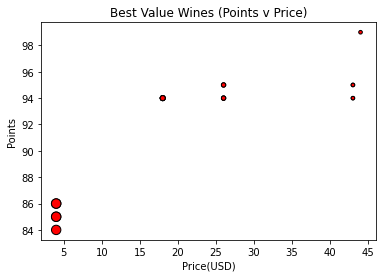

In [109]:
er = plt.scatter(df.price,df.points, s=df.value_score*4,marker="o",facecolors="red", edgecolors="black")
plt.title("Best Value Wines (Points v Price)")
plt.xlabel("Price(USD)")
plt.ylabel("Points")

er.figure.savefig('Output/best_value_wines.png')

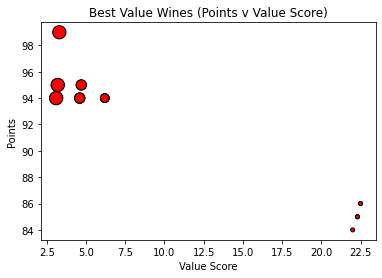

In [108]:
et = plt.scatter(df.value_score,df.points, s=df.price*4,marker="o",facecolors="red", edgecolors="black")
plt.title("Best Value Wines (Points v Value Score)")
plt.xlabel("Value Score")
plt.ylabel("Points")

et.figure.savefig('Output/best_value_wines-pointsvsvalue.png')

In [70]:
wine_data_df = wine_data_df.dropna(subset= ["price"])
wine_data_df = wine_data_df.dropna(subset= ["country"])
wine_data_df = wine_data_df.dropna(subset= ["taster_name"])

wine_data_df = wine_data_df.reset_index(drop=True)

wine_data_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [71]:
#Getting Wine summary per country
total_countries = len(wine_data_df.country.unique())

country_summary = wine_data_df.groupby(['country'])

country_names = wine_data_df.country.sort_values().unique()

mean_points = wine_data_df.points.mean()

mean_price = wine_data_df.price.mean()

meanprice_country = list(country_summary.price.mean())

meanscore_country = list(country_summary.points.mean())

#Reviewer Summary
total_reviewers = len(wine_data_df.taster_name.unique())

reviewer_summary = wine_data_df.groupby(['taster_name']) 

reviewer_names = wine_data_df.taster_name.sort_values().unique()

meanprice_reviewer = list(reviewer_summary.price.mean())

meanscore_reviewer = list(reviewer_summary.points.mean())


In [72]:
#Reviewer Summary 
reviewer_summary_df0 = pd.DataFrame({"Taster": reviewer_names, 
                                "Average Score" : meanscore_reviewer,
                                 "Average Price (USD)": meanprice_reviewer})

reviewer_summary_df = pd.DataFrame({"Taster": reviewer_names, 
                                "Average Score" : meanscore_reviewer,
                                 "Average Price (USD)": meanprice_reviewer})

#Refromating Avg Score and Price
reviewer_summary_df ["Average Score"] = reviewer_summary_df.apply(lambda x: "{:,.2f}".format(x["Average Score"]), axis=1)
reviewer_summary_df["Average Price (USD)"] = reviewer_summary_df.apply(lambda x: "${:,.2f}".format(x["Average Price (USD)"]), axis=1)

reviewer_summary_df

,Taster,Average Score,Average Price (USD)
0,Alexander Peartree,85.85,$29.05
1,Anna Lee C. Iijima,88.41,$29.79
2,Anne KrebiehlÂ MW,90.61,$31.24
3,Carrie Dykes,86.38,$30.75
4,Christina Pickard,87.83,$29.33
5,Fiona Adams,86.89,$31.15
6,Jeff Jenssen,88.33,$22.31
7,Jim Gordon,88.63,$26.94
8,Joe Czerwinski,88.54,$35.18
9,Kerin OâKeefe,88.91,$41.95


In [73]:
top_5_reviewers = reviewer_summary_df.sort_values(by="Average Score", ascending=False).head(5).reset_index(drop=True)
top_5_reviewers

,Taster,Average Score,Average Price (USD)
0,Anne KrebiehlÂ MW,90.61,$31.24
1,Matt Kettmann,90.03,$38.64
2,Virginie Boone,89.22,$46.62
3,Mike DeSimone,89.10,$28.13
4,Paul Gregutt,89.09,$33.64


In [115]:
reviewer_summary_df0.hvplot(x = 'Average Score',
                            y = 'Average Price (USD)',
                            kind = 'scatter',
                            c = 'Taster')



:Scatter   [Average Score]   (Average Price (USD),Taster)

In [75]:
# Country Summary 
country_summary_df0 = pd.DataFrame({"Country": country_names, 
                                "Average Score" : meanscore_country,
                                 "Average Price (USD)": meanprice_country})

country_summary_df = pd.DataFrame({"Country": country_names, 
                                "Average Score" : meanscore_country,
                                 "Average Price (USD)": meanprice_country})

#Refromating Avg Score and Price
country_summary_df ["Average Score"] = country_summary_df.apply(lambda x: "{:,.2f}".format(x["Average Score"]), axis=1)
country_summary_df["Average Price (USD)"] = country_summary_df.apply(lambda x: "${:,.2f}".format(x["Average Price (USD)"]), axis=1)

country_summary_df

,Country,Average Score,Average Price (USD)
0,Argentina,86.71,$24.45
1,Armenia,87.50,$14.50
2,Australia,88.81,$37.49
3,Austria,90.20,$30.78
4,Bosnia and Herzegovina,86.50,$12.50
5,Brazil,84.66,$23.77
6,Bulgaria,87.94,$14.65
7,Canada,89.37,$35.64
8,Chile,86.51,$20.87
9,China,89.00,$18.00


In [76]:
top_5_country = country_summary_df.sort_values(by="Average Score", ascending=False).head(5).reset_index(drop=True)
top_5_country

,Country,Average Score,Average Price (USD)
0,England,91.55,$51.68
1,India,90.22,$13.33
2,Austria,90.20,$30.78
3,Germany,89.84,$42.45
4,Canada,89.37,$35.64


In [114]:
country_summary_df0.hvplot(x = 'Average Score',
                            y = 'Average Price (USD)',
                            kind = 'scatter',
                            c = 'Country')


:Scatter   [Average Score]   (Average Price (USD),Country)

In [78]:
# List off words to look for
fruit_list = ['cherry','plum','apple','blackberry','lemon',
    'raspberry','peach','pear','currant','lime',
    'orange','strawberry','melon','grapefruit',
    'pineapple','apricot','cranberry','blueberry','tangerine',
    'prune','nectarine','tomato','mango','pomegranate',
    'boysenberry','coconut','banana','lychee','papaya',
    'honeydew','gooseberry','kiwi']

# Build dictionary with words as keys and empty sub-dictionaries as values
country_fruits = {}

# Add empty row for fruit totals
country_fruits['Total'] = dict.fromkeys(fruit_list + ['Wine Total','Fruit Total'],0)

# For each wine, check description for fruit words
for entry in wine_data_df.index:
    country = wine_data_df['country'][entry]
    if not pd.isna(country):
        # Add country if needed
        if country not in country_fruits.keys():
            country_fruits[country] = dict.fromkeys(fruit_list + ['Wine Total','Fruit Total'],0)

        # Count the wine itself
        country_fruits[country]['Wine Total'] += 1
        country_fruits['Total']['Wine Total'] += 1

        # For each instance of a fruit word, increment the revelant counters
        for fruit in fruit_list:
            if fruit in wine_data_df['description'][entry]:
                country_fruits[country][fruit] += 1
                country_fruits[country]['Fruit Total'] += 1
                country_fruits['Total'][fruit] += 1
                country_fruits['Total']['Fruit Total'] += 1

In [79]:
# Flip resulting dataframe to make narrower
country_fruits_df = pd.DataFrame(country_fruits).transpose()

# Filter countries with inadequate sample size
sample_min = 100
country_fruits_df = country_fruits_df.loc[country_fruits_df['Wine Total'] >= sample_min, :]

# Calculate fruit ratios
country_fruits_df['Fruitiness'] = ((country_fruits_df['Fruit Total'] / country_fruits_df['Wine Total']) * 100)

# Sort and format
sort_by = 'Fruitiness'
country_fruits_df = country_fruits_df.sort_values(by = sort_by, ascending = False)
country_fruits_df['Fruitiness %'] = country_fruits_df['Fruitiness'].map("{:.1f}%".format)

# Move the totals to the bottom
country_fruits_df = pd.concat([country_fruits_df.drop('Total'),country_fruits_df.loc['Total'].to_frame().T])

# Show the dataframe
country_fruits_df

,cherry,plum,apple,blackberry,lemon,raspberry,peach,pear,currant,lime,...,banana,lychee,papaya,honeydew,gooseberry,kiwi,Wine Total,Fruit Total,Fruitiness,Fruitiness %
Israel,270,114,52,99,43,90,52,37,29,26,...,1,4,1,10,5,1,484,1208,249.586777,249.6%
Bulgaria,78,35,27,23,36,30,12,1,3,7,...,1,1,1,2,1,1,141,333,236.170213,236.2%
Hungary,30,18,39,4,36,10,43,25,0,8,...,0,3,1,2,1,0,144,340,236.111111,236.1%
Germany,205,187,535,17,609,32,743,180,5,631,...,1,14,2,33,22,2,2093,4837,231.103679,231.1%
Romania,49,28,29,5,25,8,24,10,0,6,...,3,2,1,3,2,0,120,246,205.0,205.0%
South Africa,233,295,290,102,90,107,152,119,79,121,...,16,6,2,30,61,9,1220,2329,190.901639,190.9%
Italy,5277,1702,1809,1046,689,1573,1177,974,512,211,...,82,27,21,99,20,23,10121,19115,188.864737,188.9%
Spain,1000,2078,932,928,396,705,453,153,226,351,...,107,54,134,26,21,27,6509,10560,162.236903,162.2%
Canada,38,26,49,11,28,11,24,23,1,21,...,0,8,7,0,4,0,253,394,155.731225,155.7%
Argentina,508,1133,301,787,170,330,156,93,133,107,...,82,144,50,17,3,3,3753,5514,146.922462,146.9%


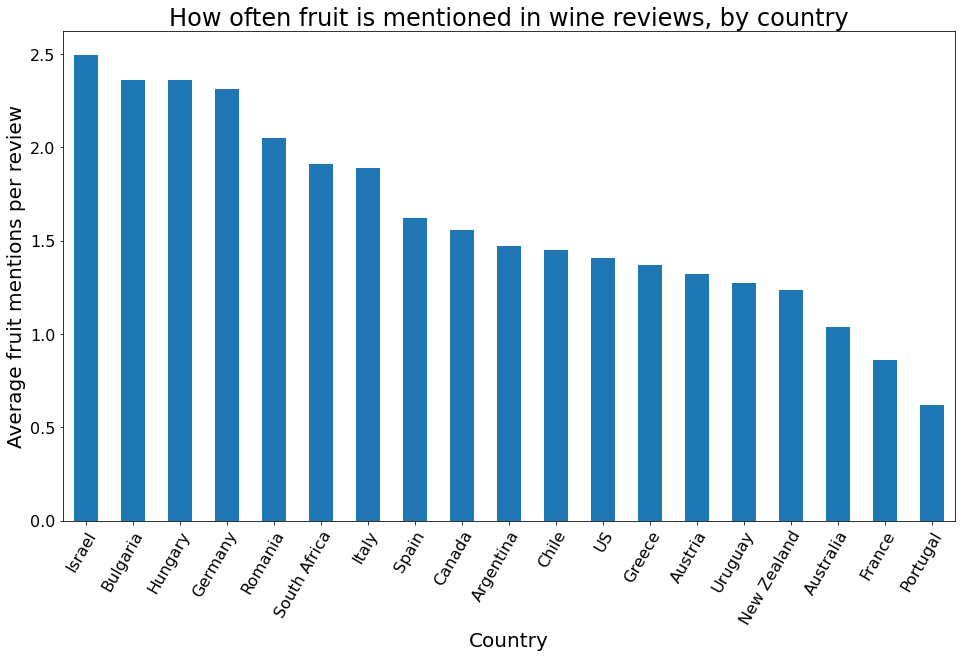

In [80]:
# Based on the number of times specific fruits are mentioned in reviews, what countries are known for proportionally fruitier wine?

# Copy the dataframe, without the totals row
bar_df = pd.DataFrame(country_fruits_df.iloc[:country_fruits_df.shape[0] - 1,:])

# Make the fruitiness numbers into ratios rather than percents
bar_df['Fruitiness'] = bar_df['Fruitiness'] / 100

# Build the bar graph
ax = bar_df.plot.bar(y = 'Fruitiness', legend = False, figsize = (16,9), fontsize = 16)
ax.set_title('How often fruit is mentioned in wine reviews, by country', fontsize = 24)
ax.set_xlabel('Country', fontsize = 20)
ax.set_ylabel('Average fruit mentions per review', fontsize = 20)
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 60, ha = 'right', rotation_mode = 'anchor')

# Save it
ax.figure.savefig('Output/fruit_by_the_country.png')

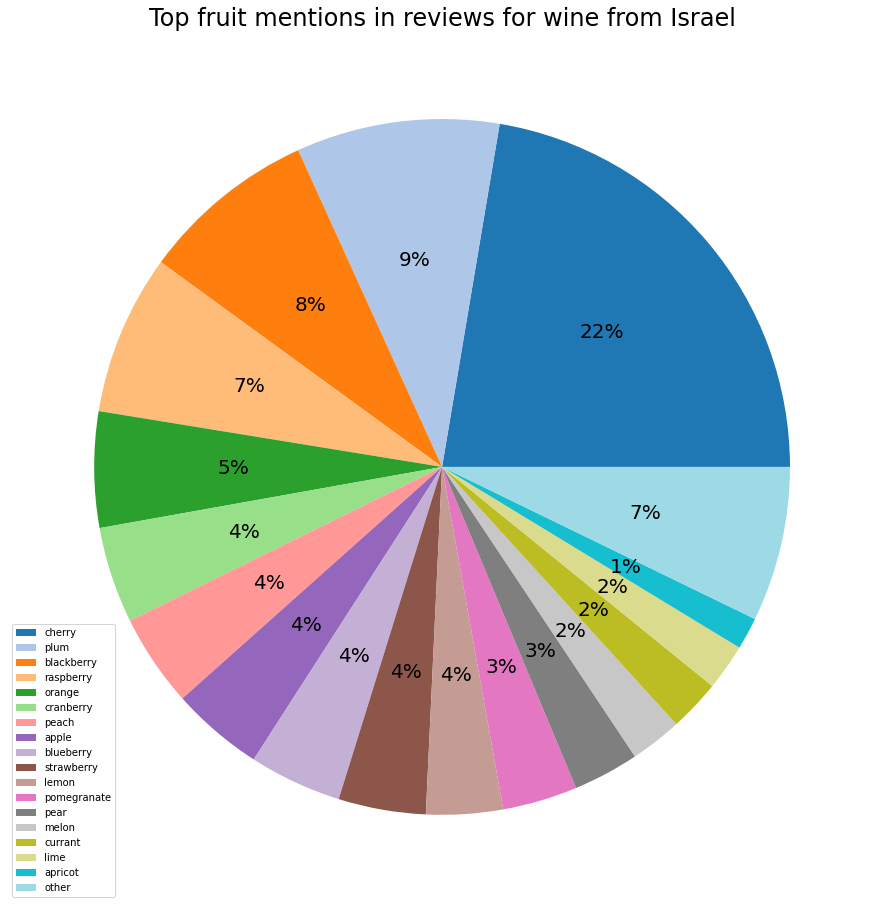

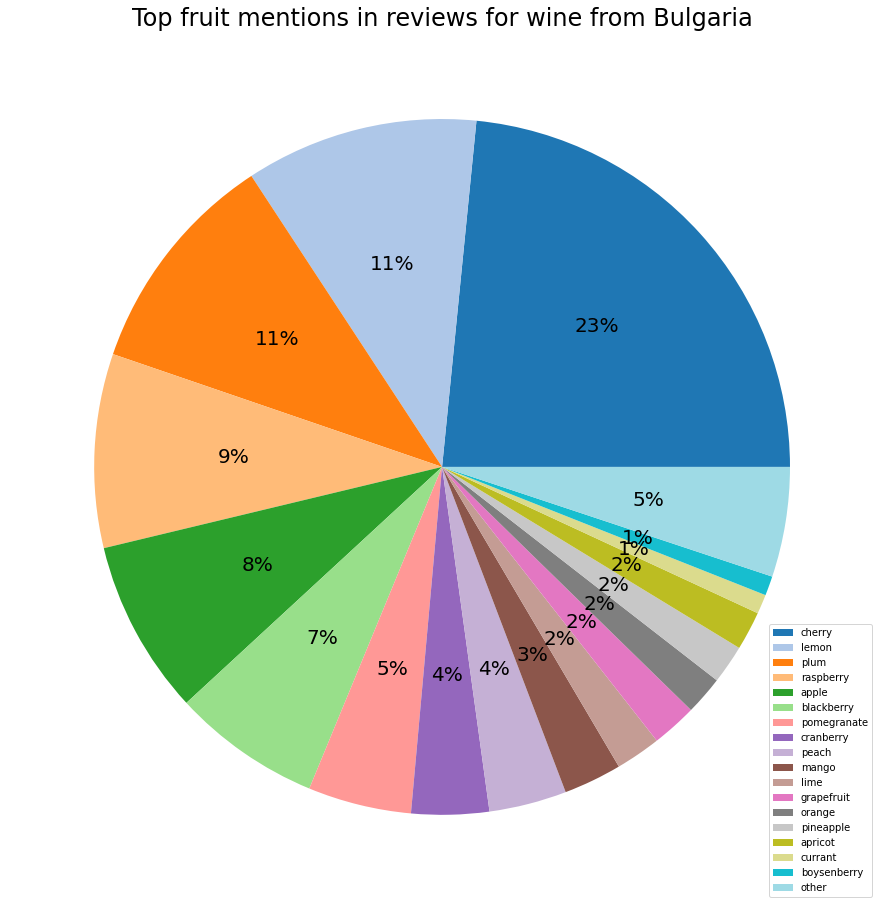

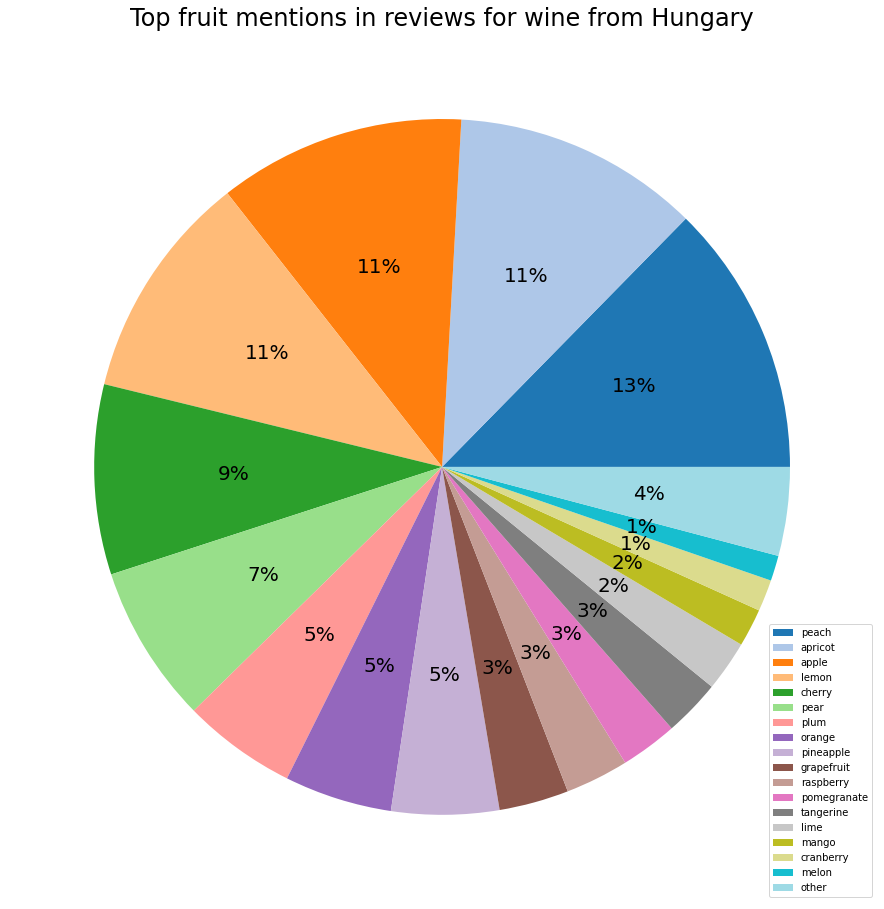

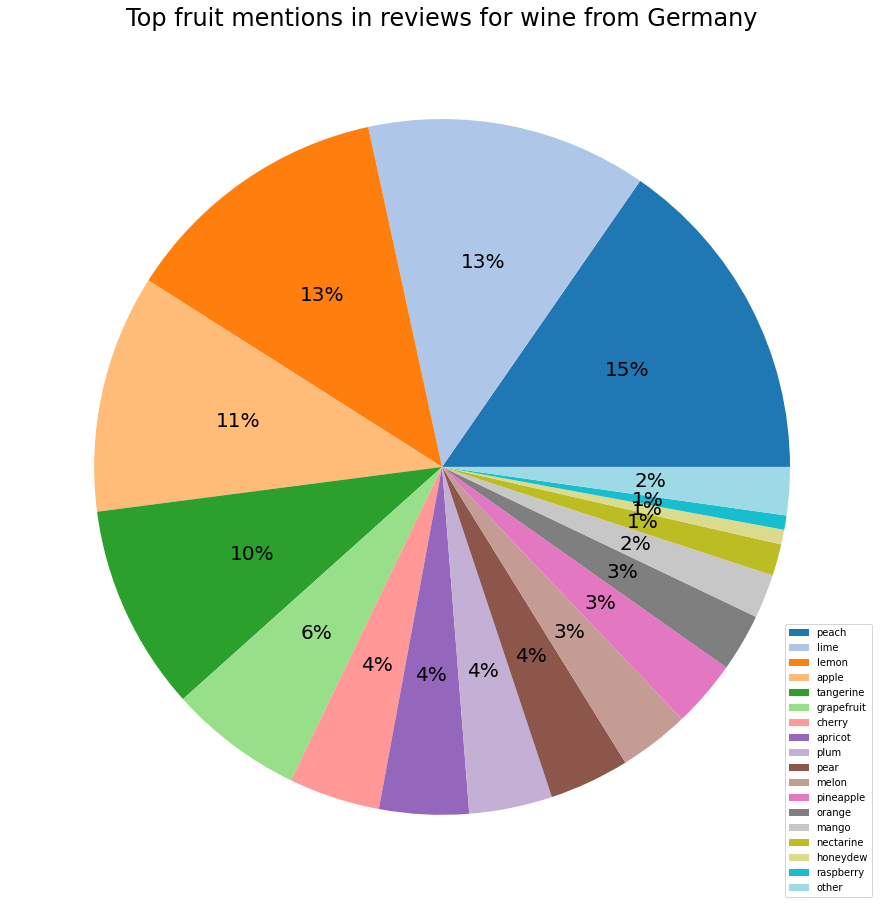

In [81]:
# For each of the four countries with the fruitiest wine, as determined by the previous question, what fruits are mentioned most frequently?

# Make another copy of the dataframe, this time with just the top 4 countries and only columns counting specific fruits, and flip the whole thing to prepare it for baking into pie charts
pies_df = pd.DataFrame(country_fruits_df.iloc[0:4,0:country_fruits_df.shape[1] - 4]).T

# Define after which number of fruits the remainder should be lumped into 'other'
other = 17

# Make pie charts for every country
for country_name in pies_df:
    
    # Get the column position of the current country
    position = pies_df.columns.get_loc(country_name)

    # Make a dataframe for just the current country
    pie_slice_df = pies_df.sort_values(by = country_name, ascending = False).iloc[:,position:position + 1]

    # Get the top {other} fruits for that country and flip it so 'other' can be added as a column
    top_fruits = pd.DataFrame(pie_slice_df.iloc[0:other,:]).T
    # Lump the rest into 'other'
    top_fruits['other'] = pie_slice_df.iloc[other:,:].sum()

    # Flip it back for pie chart-ification
    top_fruits = top_fruits.T
    ax = top_fruits.plot.pie(y = country_name, figsize = (16,16), autopct = '%1.0f%%', cmap = 'tab20', labels = None, fontsize = 20)
    ax.set_title(f'Top fruit mentions in reviews for wine from {country_name}', fontsize = 24)
    ax.set_ylabel(None)

    # Save the pie chart
    ax.figure.savefig(f'Output/{country_name}_top_fruits.png')

In [82]:
# Convert key words dictionary into a dataframe
wine_data_df['Key Words']= wine_data_df['Unnamed: 0'].map(key_words)
wine_data_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Key Words
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,"[ripe, fruity, wine, smooth, still, structured..."
1,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"[tart, snappy, flavors, lime, flesh, rind, dom..."
2,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"[pineapple, rind, lemon, pith, orange, blossom..."
3,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"[much, like, regular, bottling, comes, across,..."
4,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,"[blackberry, raspberry, aromas, show, typical,..."


In [83]:
############ CREATING WORD BANKS FOR DIFFERENT AREAS OF DESCRIPTIVENESS

# Scale 1: Fruit-forward to savory
fruit_forward = ['raspberry','blackberry','blueberry','jam','prune','fruit','raisin','lemon','apple','orange','peach','mango','pineapple',\
'pear','cantaloupe','melon','berry','fruit','fruits','fruity','plum','citrus','orange','apricot', 'grapefruit','grape','grapes',\
'tangerine','berries','jammy','candied','nectarine','gooseberry','boysenberry','elderberry','berries']
savory = ['cranberry','rhubarb','currant','pepper','peppercorn','olive','sour','cherry','mulberry','bilberry','peony','blueberry','herbs','game','sage',\
          'leather','tobacco','charcoal','tar','underbrush','garrigue','gravel','torrefaction','mineral','woodsmoke','grass','oak','wood','earthy','stone']
# Scale 2: Sweetness
sweet = ['sweet', 'sweetness']
dry = ['dry','dryness']

# Scale 3: Body
light_body = ['subtle','delicate','elegant','crisp','thin','finesse','bright','floral','light','zesty','airy','lean','racy','crisp','zippy','austere',\
              'long','brilliant','lively','moderate','juicy','fleshy','tart','mellow','soft']
full_body = ['rich','lush','opulent','rigid','intense','bold','extracted','tannins','firm','structured','muscular','concentrated','hot','oily','buttery']



In [84]:
############# Creating new columns for each of these categories

# Initilize dictionaries for each category
num_fruit = {}
num_savory = {}
num_sweet = {}
num_dry = {}
num_light = {}
num_full = {}

# Loop through the key words column
for i, desc in enumerate(wine_data_df["description"]):
    
     # Initilize/reset variables
    fruit_ct = 0
    savory_ct = 0
    sweet_ct = 0
    dry_ct = 0
    light_ct = 0
    full_ct = 0
    
    # Remove accents
    unaccented = word = unicodedata.normalize('NFD', desc).encode('ascii', 'ignore').decode("utf-8")
    # Separate words into list
    desc_words = re.split(r'\W+', unaccented)
    
    # Clean up words
    for word in desc_words:
        # Make lowercase
        word = word.lower()    
   
        if word in fruit_forward:
            fruit_ct += 1
        if word in savory:
            savory_ct += 1
        if word in sweet:
            sweet_ct += 1
        if word in dry:
            dry_ct += 1
        if word in light_body:
            light_ct += 1
        if word in full_body:
            full_ct += 1
            
        num_fruit[i] = fruit_ct 
        num_savory[i] = savory_ct
        num_sweet [i] = sweet_ct
        num_dry[i] = dry_ct
        num_light[i] = light_ct
        num_full[i] = full_ct

In [85]:
wine_data_df['Fruit Forward']= wine_data_df['Unnamed: 0'].map(num_fruit)
wine_data_df['Savory']= wine_data_df['Unnamed: 0'].map(num_savory)
wine_data_df['Sweet']= wine_data_df['Unnamed: 0'].map(num_sweet)
wine_data_df['Dry']= wine_data_df['Unnamed: 0'].map(num_dry)
wine_data_df['Light Body']= wine_data_df['Unnamed: 0'].map(num_light)
wine_data_df['Full Body']= wine_data_df['Unnamed: 0'].map(num_full)

# Drop unnecessary columns for a clean look
data_clean = wine_data_df.drop(columns=['region_2','taster_name','taster_twitter_handle'])
data_clean.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,title,variety,winery,Key Words,Fruit Forward,Savory,Sweet,Dry,Light Body,Full Body
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,"[ripe, fruity, wine, smooth, still, structured...",1.0,0.0,0.0,0.0,2.0,0.0
1,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"[tart, snappy, flavors, lime, flesh, rind, dom...",4.0,0.0,0.0,0.0,0.0,1.0
2,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"[pineapple, rind, lemon, pith, orange, blossom...",0.0,1.0,0.0,0.0,0.0,0.0
3,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"[much, like, regular, bottling, comes, across,...",4.0,1.0,0.0,0.0,0.0,0.0
4,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,"[blackberry, raspberry, aromas, show, typical,...",2.0,1.0,0.0,0.0,2.0,1.0


In [86]:
############ NORMALIZE VARIALBES TO A SCALE

# Define a function that normalizes a column
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Create a scale for fruit forward to savory
fruit_scale = normalize(data_clean["Fruit Forward"])
savory_scale = (normalize(data_clean["Savory"]))*(-1)
fruit_savory_scale = fruit_scale + savory_scale

# Create a scale for light to clean body
light_scale = normalize(data_clean["Light Body"])*(-1)
full_scale = normalize(data_clean["Full Body"])
body_scale = light_scale + full_scale

# Add normalized columns to dataframe
data_clean['Fruit Forward to Savory Scale']= data_clean['Unnamed: 0'].map(fruit_savory_scale)
data_clean['Body Scale']= data_clean['Unnamed: 0'].map(body_scale)

data_clean.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,title,variety,winery,Key Words,Fruit Forward,Savory,Sweet,Dry,Light Body,Full Body,Fruit Forward to Savory Scale,Body Scale
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,"[ripe, fruity, wine, smooth, still, structured...",1.0,0.0,0.0,0.0,2.0,0.0,0.444444,0.142857
1,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"[tart, snappy, flavors, lime, flesh, rind, dom...",4.0,0.0,0.0,0.0,0.0,1.0,-0.111111,0.000000
2,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,"[pineapple, rind, lemon, pith, orange, blossom...",0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.000000
3,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"[much, like, regular, bottling, comes, across,...",4.0,1.0,0.0,0.0,0.0,0.0,0.111111,-0.142857
4,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,"[blackberry, raspberry, aromas, show, typical,...",2.0,1.0,0.0,0.0,2.0,1.0,0.000000,0.142857


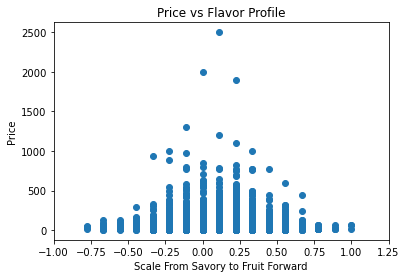

In [105]:
########### CREATING PLOTS USING THESE NORMALIZED SCALES

tl = plt.scatter(data_clean["Fruit Forward to Savory Scale"], data_clean["price"])
plt.xlim(-1, 1.25, .25)
plt.xlabel("Scale From Savory to Fruit Forward")
plt.ylabel("Price")
plt.title("Price vs Flavor Profile")

tl.figure.savefig('Output/Price_vs_flavor.png')

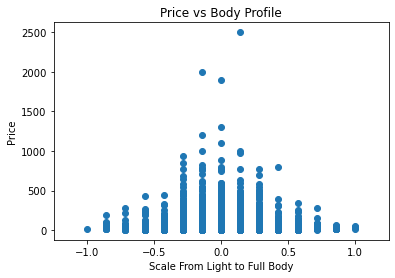

In [106]:
tls = plt.scatter(data_clean["Body Scale"], data_clean["price"])
plt.xlim(-1.25, 1.25, .25)
plt.xlabel("Scale From Light to Full Body")
plt.ylabel("Price")
plt.title("Price vs Body Profile")

tls.figure.savefig('Output/pricevsbody.png')